## 1) Load Data and Modules

#### Load Python Modules

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# saving model
import pickle

#### Load Data

In [2]:
df = pd.read_csv('adult.csv')

## 2) Initial Data Exploration

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# replace missing values with NaN, which is recognizable by pandas
df = df.replace('?', np.NaN)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

## 3) Data Visualization

### · Income distribution among all people

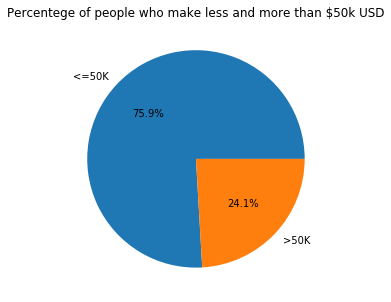

In [10]:
# making plot for 'income' distribution
plt.figure(figsize=(15,5))
df['income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel(None)
plt.title('Percentege of people who make less and more than $50k USD')
plt.show()


We can see that only 24.1% of the people earn more than 50k USD

### · Average age distribution depending on income

In [11]:
# grouping data by 'income' types and get average 'age' for each category
age_avg = df[['age', 'income']].groupby('income', as_index=False).mean().round(1)


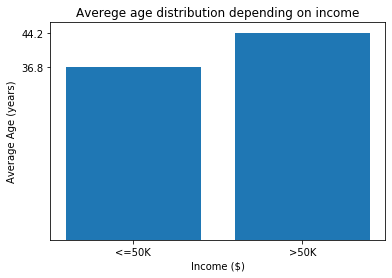

In [12]:
# making plot for 'age' distribution
plt.bar(age_avg['income'], age_avg['age'])
plt.yticks(age_avg['age'])
plt.xlabel('Income ($)')
plt.ylabel('Average Age (years)')
plt.title('Averege age distribution depending on income')
plt.show()

As we see, the average age for people who makes less then 50k USD is 36.8 years and for those who make more than 50k USD is 44.2 years.

##### We consider using "age" values for our classification model

### · Work class distribution depending on income

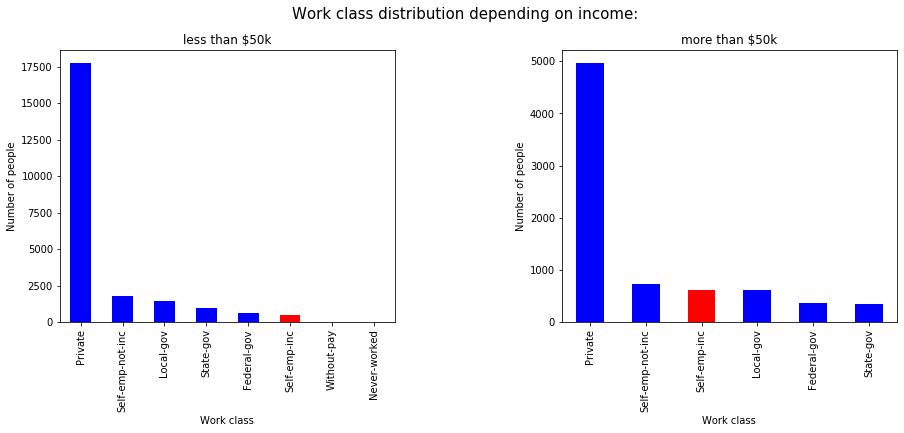

In [13]:
# 'workclass' distribution subplots
plt.figure(figsize=(15,5))

# making plot for 'workclass' distribution (less than $50k)
plt.subplot(1,2,1)
df[df['income'] == '<=50K']['workclass'].value_counts().plot.bar(color=['b', 'b', 'b', 'b', 'b', 'r', 'b', 'b'])
plt.xlabel('Work class')
plt.ylabel('Number of people')
plt.title('less than $50k')

# making plot for 'workclass' distribution (more than $50k)
plt.subplot(1,2,2)
df[df['income'] == '>50K']['workclass'].value_counts().plot.bar(color=['b', 'b', 'r', 'b', 'b', 'b'])
plt.xlabel('Work class')
plt.ylabel('Number of people')
plt.title('more than $50k')

plt.subplots_adjust(wspace = 0.5)
plt.suptitle('Work class distribution depending on income:',  fontsize=15, y=1)
plt.show()

According to these plots we can see that some work classes (for example "Self-emp-inc") are more likely to earn more than 50k USD, and there are no people who earn more than 50k USD in "Never-worked" and "Without-pay" categories.

##### We consider using "workclass" values for our classification model

### · Education degree distribution depending on income

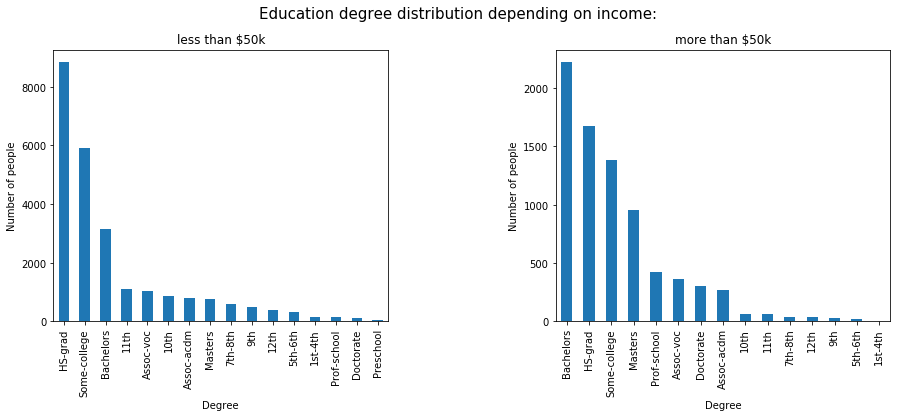

In [14]:
# 'education' distribution subplots
plt.figure(figsize=(15,5))

# making plot for 'education' distribution (less than $50k)
plt.subplot(1,2,1)
df[df['income'] == '<=50K']['education'].value_counts().plot.bar()
plt.xlabel('Degree')
plt.ylabel('Number of people')
plt.title('less than $50k')

# making plot for 'education' distribution (more than $50k)
plt.subplot(1,2,2)
df[df['income'] == '>50K']['education'].value_counts().plot.bar()
plt.xlabel('Degree')
plt.ylabel('Number of people')
plt.title('more than $50k')

plt.subplots_adjust(wspace = 0.5)
plt.suptitle('Education degree distribution depending on income:',  fontsize=15, y=1)
plt.show()

Obviously, people who have higher education level are more likely to earn more than 50k USD.

##### We consider using "education" values for our classification model

### · Marital status distribution depending on income

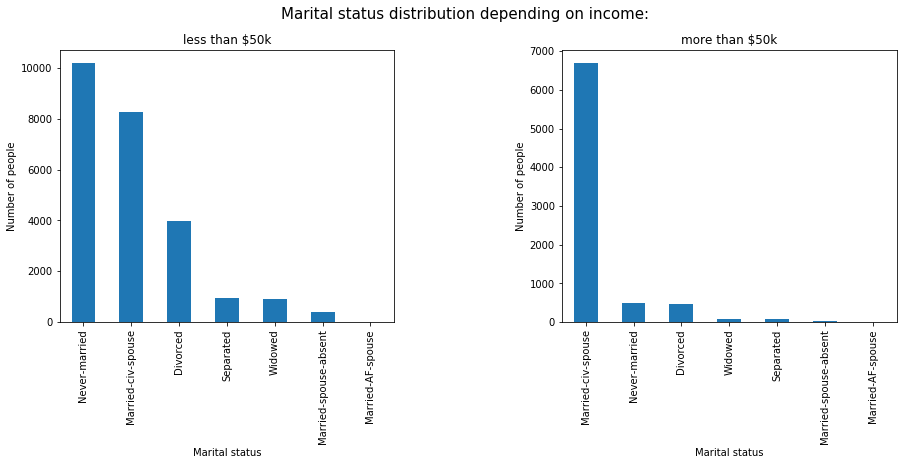

In [15]:
# 'marital.status' distribution subplots
plt.figure(figsize=(15,5))

# making plot for 'marital.status' distribution (less than $50k)
plt.subplot(1,2,1)
df[df['income'] == '<=50K']['marital.status'].value_counts().plot.bar()
plt.xlabel('Marital status')
plt.ylabel('Number of people')
plt.title('less than $50k')

# making plot for 'marital.status' distribution (more than $50k)
plt.subplot(1,2,2)
df[df['income'] == '>50K']['marital.status'].value_counts().plot.bar()
plt.xlabel('Marital status')
plt.ylabel('Number of people')
plt.title('more than $50k')

plt.subplots_adjust(wspace = 0.5)
plt.suptitle('Marital status distribution depending on income:',  fontsize=15, y=1)
plt.show()

We can clearly see that majority of peple who earn more than 50k USD have "Married-civ-spouse" status.

##### We consider using "marital.status" values for our classification model

### · Occupation type distribution depending on income

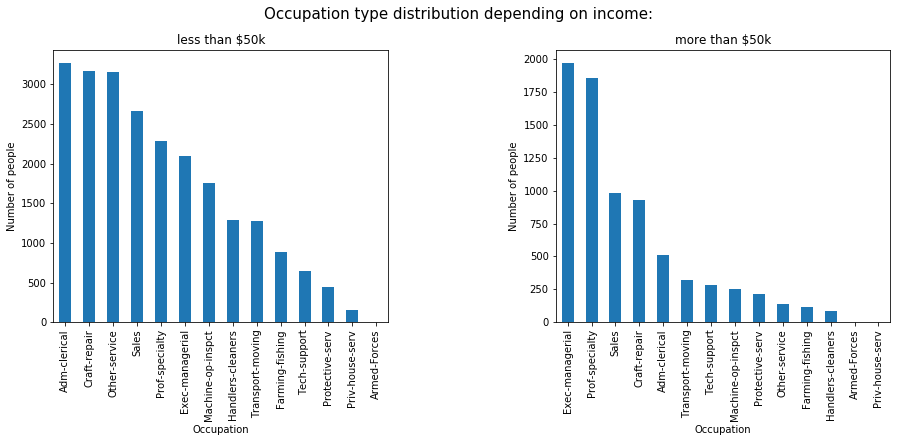

In [16]:
# 'occupation' distribution subplots
plt.figure(figsize=(15,5))

# making plot for 'occupation' distribution (less than $50k)
plt.subplot(1,2,1)
df[df['income'] == '<=50K']['occupation'].value_counts().plot.bar()
plt.xlabel('Occupation')
plt.ylabel('Number of people')
plt.title('less than $50k')

# making plot for 'occupation' distribution (more than $50k)
plt.subplot(1,2,2)
df[df['income'] == '>50K']['occupation'].value_counts().plot.bar()
plt.xlabel('Occupation')
plt.ylabel('Number of people')
plt.title('more than $50k')

plt.subplots_adjust(wspace = 0.5)
plt.suptitle('Occupation type distribution depending on income:',  fontsize=15, y=1)
plt.show()

Obviously, the salary always depends on occupation, and we can clearly see that on the plots.

##### We consider using "occupation" values for our classification model

### · Relationship status distribution depending on income

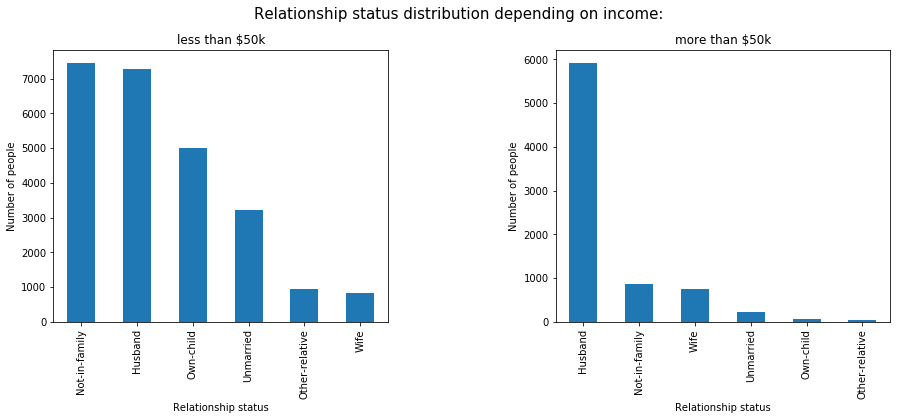

In [17]:
# 'relationship' distribution subplots
plt.figure(figsize=(15,5))

# making plot for 'relationship' distribution (less than $50k)
plt.subplot(1,2,1)
df[df['income'] == '<=50K']['relationship'].value_counts().plot.bar()
plt.xlabel('Relationship status')
plt.ylabel('Number of people')
plt.title('less than $50k')

# making plot for 'relationship' distribution (more than $50k)
plt.subplot(1,2,2)
df[df['income'] == '>50K']['relationship'].value_counts().plot.bar()
plt.xlabel('Relationship status')
plt.ylabel('Number of people')
plt.title('more than $50k')

plt.subplots_adjust(wspace = 0.5)
plt.suptitle('Relationship status distribution depending on income:',  fontsize=15, y=1)
plt.show()

The plots show us that majority of people who earn more than 50k USD are in "Husband" category, and people in "Not-in-family" are likely to earn less than 50k USD.

##### We consider using "relationship" values for our classification model

### · Race distribution depending on income

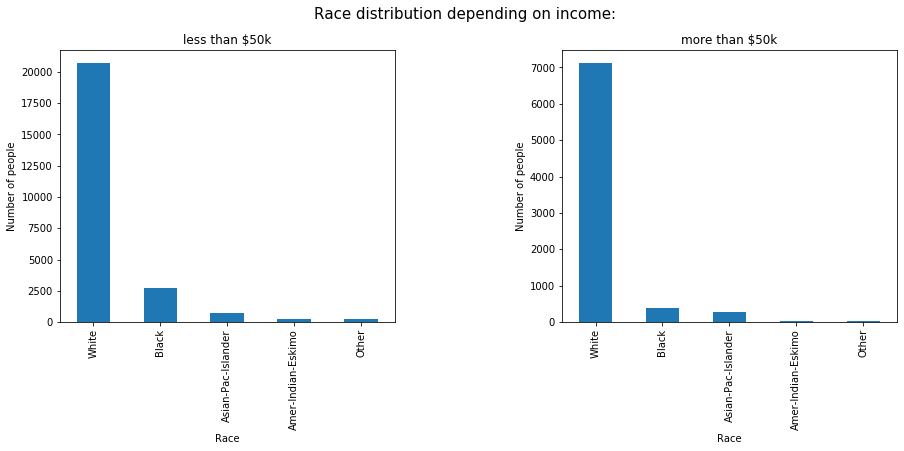

In [18]:
# 'race' distribution subplots
plt.figure(figsize=(15,5))

# making plot for 'race' distribution (less than $50k)
plt.subplot(1,2,1)
df[df['income'] == '<=50K']['race'].value_counts().plot.bar()
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.title('less than $50k')

# making plot for 'race' distribution (more than $50k)
plt.subplot(1,2,2)
df[df['income'] == '>50K']['race'].value_counts().plot.bar()
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.title('more than $50k')

plt.subplots_adjust(wspace = 0.5)
plt.suptitle('Race distribution depending on income:',  fontsize=15, y=1)
plt.show()

According to the plots we can make a conclusion that there is some difference for "Black" race, so we can try adding it to our model to make prediction accuracy better. 

##### We consider using "race" values for our classification model 

### · Sex distribution depending on income

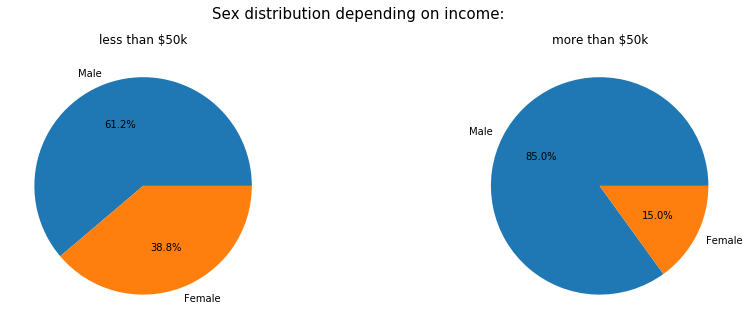

In [19]:
# 'sex' distribution subplots
plt.figure(figsize=(15,5))

# making plot for 'sex' distribution (less than $50k)
plt.subplot(1,2,1)
df[df['income'] == '<=50K']['sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel(None)
plt.title('less than $50k')

# making plot for 'sex' distribution (more than $50k)
plt.subplot(1,2,2)
df[df['income'] == '>50K']['sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel(None)
plt.title('more than $50k')

plt.suptitle('Sex distribution depending on income:',  fontsize=15, y=1)
plt.show()

We can see that women are more likely to earn less than 50k USD.

##### We consider using "relationship" values for our classification model

### · Capital gain distribution depending on income

In [20]:
# grouping data by 'income' types and get average 'capital.gain' for each category
capg_avg = df[['capital.gain', 'income']].groupby('income', as_index=False).mean()

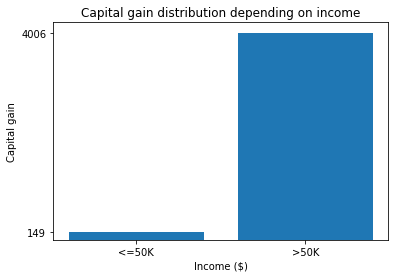

In [21]:
# making plot for 'capital.gain' distribution
plt.bar(capg_avg['income'], capg_avg['capital.gain'])
plt.yticks(capg_avg['capital.gain'])
plt.xlabel('Income ($)')
plt.ylabel('Capital gain')
plt.title('Capital gain distribution depending on income')
plt.show()

We can see that people who earn more than 50k USD have much higher average capital gain.

##### We consider using "capital.gain" values for our classification model

### · Capital loss distribution depending on income

In [22]:
# grouping data by 'income' types and get average 'capital.loss' for each category
capl_avg = df[['capital.loss', 'income']].groupby('income', as_index=False).mean()

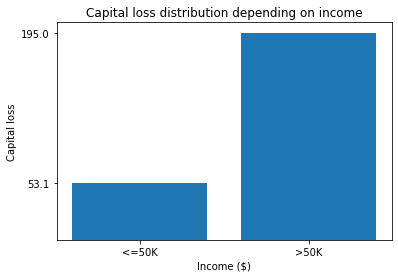

In [23]:
# making plot for 'capital.loss' distribution
plt.bar(capl_avg['income'], capl_avg['capital.loss'])
plt.yticks(capl_avg['capital.loss'])
plt.xlabel('Income ($)')
plt.ylabel('Capital loss')
plt.title('Capital loss distribution depending on income')
plt.show()

We can see that people who earn more than 50k USD have much higher average capital loss.

##### We consider using "capital.loss" values for our classification model

### · Working hours per week distribution depending on income

In [24]:
# grouping data by 'income' types and get average 'hours.per.week' for each category
hpw_avg = df[['hours.per.week', 'income']].groupby('income', as_index=False).mean().round(1)

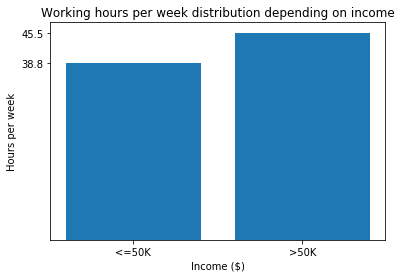

In [25]:
# making plot for 'hours.per.week' distribution
plt.bar(hpw_avg['income'], hpw_avg['hours.per.week'])
plt.yticks(hpw_avg['hours.per.week'])
plt.xlabel('Income ($)')
plt.ylabel('Hours per week')
plt.title('Working hours per week distribution depending on income')
plt.show()

The plot shows that people who make more than 50k USD usually work more hours per week

##### We consider using "hours.per.week" values for our classification model

### · Native country distribution depending on income

In [26]:
# counting number of people who earn more than 50K USD for each nationality
more = df[df['income'] == '>50K']['native.country'].value_counts()

# calculating percentege of people who earn less more 50K USD for each nationality
more_pc = round(more / more.sum() * 100, 2)

In [27]:
# counting number of people who earn less than 50K USD for each nationality
less = df[df['income'] == '<=50K']['native.country'].value_counts()

# calculating percentege of people who earn less than 50K USD for each nationality
less_pc = round(less / less.sum() * 100, 2)

In [28]:
# combining two data series into one dataframe
nation_df = pd.concat([more_pc, less_pc], axis=1, ignore_index=True, sort=False)

# renaming columns
nation_df.columns = ['More than $50K (%)', 'Less than $50K (%)']

# sorting values to get highest percentage
nation_df = nation_df.sort_values(by='Less than $50K (%)', ascending=False)

In [29]:
# showing first 5 countries with highest percentage
print(nation_df.head())

               More than $50K (%)  Less than $50K (%)
United-States               93.19               90.59
Mexico                       0.43                2.51
Philippines                  0.79                0.56
Puerto-Rico                  0.16                0.42
El-Salvador                  0.12                0.40


As we can see on the table almost for all the people (more than 90%) United States is a native country, and the percentage of other countries is extremely low, so we can make a conclusion that 'native.country' doesn't realy affect the salary amount in our dataset.

##### We can skip "native.country" values 

## 4) Data Preparation

### · Removing columns that we will not use for modeling

##### "fnlwgt"

According to the description for 'fnlwgt' (final weight) values (https://www.kaggle.com/uciml/adult-census-income): 
"CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state".
This means that we can't use these values for our model.

##### "education"

In [30]:
# grouping data by 'education' types and get max value from 'education.num' for each category
ed_max = df[['education', 'education.num']].groupby('education', as_index=False).max()

# grouping data by 'education' types and get min value from 'education.num' for each category
ed_min = df[['education', 'education.num']].groupby('education', as_index=False).min()

# join both results into one dataframe
ed_max.join(ed_min['education.num'], lsuffix='_max', rsuffix='_min')

,education,education.num_max,education.num_min
0,10th,6,6
1,11th,7,7
2,12th,8,8
3,1st-4th,2,2
4,5th-6th,3,3
5,7th-8th,4,4
6,9th,5,5
7,Assoc-acdm,12,12
8,Assoc-voc,11,11
9,Bachelors,13,13


We can see that each "education" category has it's own unique number (same for Min and Max values), so we can assume that "education.num" values are just unique keys for "education" values, which means we can drop "education" column and use "education.num" only.

##### "native.country"

Based on visualization we have made above.

##### dropping columns "fnlwgt", "education", "native.country"

In [31]:
df = df.drop(['fnlwgt', 'education', 'native.country'], axis=1)

In [32]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K


### · Replacing categorical string values with integer

In [33]:
# making function to get dictionary for further replacing value by index
def get_dict(data):
    dic={}
    num = 0
    for line in data:
        dic.update({line : num})
        num += 1
    return dic

##### "workclass"

In [34]:
# getting unique categorical values from "workclass" column 
wc_unq = df['workclass'].unique()

# making dictionary for further mapping
wc_dict = get_dict(wc_unq)

print(wc_dict)

{nan: 0, 'Private': 1, 'State-gov': 2, 'Federal-gov': 3, 'Self-emp-not-inc': 4, 'Self-emp-inc': 5, 'Local-gov': 6, 'Without-pay': 7, 'Never-worked': 8}


In [35]:
# mapping "workclass" column to replace values with numbers
df['workclass'] = df['workclass'].map(wc_dict).astype(int)

##### "marital.status"

In [36]:
# getting unique categorical values from "marital.status" column 
ms_unq = df['marital.status'].unique()

# making dictionary for further mapping
ms_dict = get_dict(ms_unq)

print(ms_dict)

{'Widowed': 0, 'Divorced': 1, 'Separated': 2, 'Never-married': 3, 'Married-civ-spouse': 4, 'Married-spouse-absent': 5, 'Married-AF-spouse': 6}


In [37]:
# mapping "marital.status" column to replace values with numbers
df['marital.status'] = df['marital.status'].map(ms_dict).astype(int)

##### "occupation"

In [38]:
# getting unique categorical values from "occupation" column 
oc_unq = df['occupation'].unique()

# making dictionary for further mapping
oc_dict = get_dict(oc_unq)

print(oc_dict)

{nan: 0, 'Exec-managerial': 1, 'Machine-op-inspct': 2, 'Prof-specialty': 3, 'Other-service': 4, 'Adm-clerical': 5, 'Craft-repair': 6, 'Transport-moving': 7, 'Handlers-cleaners': 8, 'Sales': 9, 'Farming-fishing': 10, 'Tech-support': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}


In [39]:
# mapping "occupations" column to replace values with numbers
df['occupation'] = df['occupation'].map(oc_dict).astype(int)

##### "relationship"

In [40]:
# getting unique categorical values from "relationship" column 
rs_unq = df['relationship'].unique()

# making dictionary for further mapping
rs_dict = get_dict(rs_unq)

print(rs_dict)

{'Not-in-family': 0, 'Unmarried': 1, 'Own-child': 2, 'Other-relative': 3, 'Husband': 4, 'Wife': 5}


In [41]:
# mapping "relationship" column to replace values with numbers
df['relationship'] = df['relationship'].map(rs_dict).astype(int)

##### "race"

In [42]:
# getting unique categorical values from "race" column 
race_unq = df['race'].unique()

# making dictionary for further mapping
race_dict = get_dict(race_unq)

print(race_dict)

{'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2, 'Other': 3, 'Amer-Indian-Eskimo': 4}


In [43]:
# mapping "race" column to replace values with numbers
df['race'] = df['race'].map(race_dict).astype(int)

##### "sex"

In [44]:
# getting unique categorical values from "sex" column 
sex_unq = df['sex'].unique()

# making dictionary for further mapping
sex_dict = get_dict(sex_unq)

print(sex_dict)

{'Female': 0, 'Male': 1}


In [45]:
# mapping "sex" column to replace values with numbers
df['sex'] = df['sex'].map(sex_dict).astype(int)

##### "income"

In [46]:
# getting unique categorical values from "income" column 
ic_unq = df['income'].unique()

# making dictionary for further mapping
ic_dict = get_dict(ic_unq)

print(ic_dict)

{'<=50K': 0, '>50K': 1}


In [47]:
# mapping "income" column to replace values with numbers
df['income'] = df['income'].map(ic_dict).astype(int)

##### Checking the result

In [48]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,0,9,0,0,0,0,0,0,4356,40,0
1,82,1,9,0,1,0,0,0,0,4356,18,0
2,66,0,10,0,0,1,1,0,0,4356,40,0
3,54,1,4,1,2,1,0,0,0,3900,40,0
4,41,1,10,2,3,2,0,0,0,3900,40,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
age               32561 non-null int64
workclass         32561 non-null int32
education.num     32561 non-null int64
marital.status    32561 non-null int32
occupation        32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
income            32561 non-null int32
dtypes: int32(7), int64(5)
memory usage: 2.1 MB


### · Data preparation for modelling

##### Separating target statement from other data

In [50]:
# removing target statement from other data
x_df = df.drop(['income'], axis=1)

# putting target statement into separate series 
y = df['income']

##### Splitting dataframe into random train and test subsets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, test_size=0.1, random_state=42)

In [52]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29304, 11) (29304,)
(3257, 11) (3257,)


## 5) Data Modelling

### LinearSVC

##### Building the model

In [53]:
linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, y_train)

C:\Users\telef\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [54]:
# making prediction 
y_pred = linear_svc.predict(X_test)

##### Model evaluation

In [55]:
# showing score
linear_svc_sc = round(linear_svc.score(X_test, y_test) *100, 2) # calculating score

print('Score:')
print(linear_svc_sc)
print('-'*50)

# showing classification report
print("Classification report:")
print(classification_report(y_test, y_pred))
print('-'*50)

# showing confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Score:
77.89
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2492
           1       0.53      0.53      0.53       765

    accuracy                           0.78      3257
   macro avg       0.69      0.69      0.69      3257
weighted avg       0.78      0.78      0.78      3257

--------------------------------------------------
Confusion matrix:
[[2129  363]
 [ 357  408]]


### KNeighborsClassifier

In [56]:
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
# making prediction 
y_pred = knc.predict(X_test)

In [58]:
# showing score
knc_sc = round(knc.score(X_test, y_test) *100, 2) # calculating score

print('Score:')
print(knc_sc)
print('-'*50)

# showing classification report
print("Classification report:")
print(classification_report(y_test, y_pred))
print('-'*50)

# showing confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Score:
83.51
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2492
           1       0.67      0.59      0.63       765

    accuracy                           0.84      3257
   macro avg       0.77      0.75      0.76      3257
weighted avg       0.83      0.84      0.83      3257

--------------------------------------------------
Confusion matrix:
[[2265  227]
 [ 310  455]]


### SVC

##### Building the model

In [59]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
# making prediction 
y_pred = svc.predict(X_test)

##### Model evaluation

In [61]:
# showing score
svc_sc = round(svc.score(X_test, y_test) *100, 2) # calculating score

print('Score:')
print(svc_sc)
print('-'*50)

# showing classification report
print("Classification report:")
print(classification_report(y_test, y_pred))
print('-'*50)

# showing confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Score:
82.81
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2492
           1       0.73      0.43      0.54       765

    accuracy                           0.83      3257
   macro avg       0.79      0.69      0.72      3257
weighted avg       0.82      0.83      0.81      3257

--------------------------------------------------
Confusion matrix:
[[2367  125]
 [ 435  330]]


### RandomForestClassifier

##### Building the model

In [62]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
# making prediction 
y_pred = rfc.predict(X_test)

##### Model evaluation

In [64]:
# showing score
rfc_sc = round(rfc.score(X_test, y_test) *100, 2) # calculating score

print('Score:')
print(rfc_sc)
print('-'*50)

# showing classification report
print("Classification report:")
print(classification_report(y_test, y_pred))
print('-'*50)

# showing confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Score:
85.45
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2492
           1       0.73      0.61      0.66       765

    accuracy                           0.85      3257
   macro avg       0.81      0.77      0.79      3257
weighted avg       0.85      0.85      0.85      3257

--------------------------------------------------
Confusion matrix:
[[2315  177]
 [ 297  468]]


### GradientBoostingClassifier

##### Building the model

In [65]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [66]:
# making prediction 
y_pred = gbc.predict(X_test)

##### Model evaluation

In [67]:
# showing score
gbc_sc = round(gbc.score(X_test, y_test) *100, 2) # calculating score

print('Score:')
print(gbc_sc)
print('-'*50)

# showing classification report
print("Classification report:")
print(classification_report(y_test, y_pred))
print('-'*50)

# showing confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Score:
84.46
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      2492
           1       0.78      0.48      0.59       765

    accuracy                           0.84      3257
   macro avg       0.82      0.72      0.75      3257
weighted avg       0.84      0.84      0.83      3257

--------------------------------------------------
Confusion matrix:
[[2387  105]
 [ 401  364]]


## 6) Models evalution 

##### Comparing  models

In [68]:
# making dataframe  with models type and its scores
models_scores = pd.DataFrame({
    'Model':['LinearSVC', 'KNeighborsClassifier', 'SVC', 'RandomForestClassifier', 'GradientBoostingClassifier'],
    'Score':[linear_svc_sc, knc_sc, svc_sc, rfc_sc, gbc_sc]
})

# sorting models by highest score
models_scores.sort_values(by='Score', ascending=False)

,Model,Score
3,RandomForestClassifier,85.45
4,GradientBoostingClassifier,84.46
1,KNeighborsClassifier,83.51
2,SVC,82.81
0,LinearSVC,77.89


##### Conclusion

To solve this task we have built several models and after comparing their scores we choose to use RandomForestClassifier as it has the best score and much better result in confusion matrix.

Note that it wasn't the only version of the solution, there were a few different variations (for example with drop NaN or "native.country" included), but this solution showed the best result.

##### Saving 'RandomForestClassifier' model, for easier further usage

In [69]:
# creating a file
saved_model = open('saved_model', 'wb') 

# saving model to the file
pickle.dump(rfc, saved_model) 

# closing the file
saved_model.close()  